In [0]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

11493376/11490434 [==============================] - 0s 0us/step


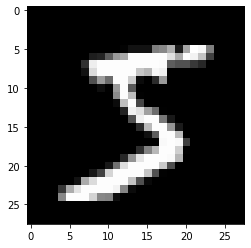

In [3]:
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [4]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.1


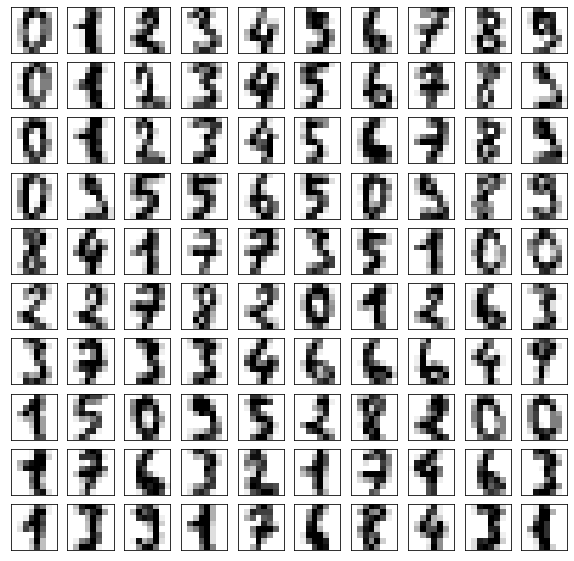

In [6]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.set(xticks=[], yticks=[])

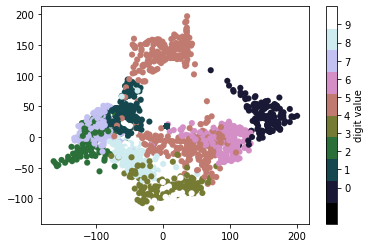

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)


#plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-2.0, 10)

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

In [0]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2610 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9872


In [12]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.9702

Test accuracy: 0.9702000021934509


In [0]:
predictions = model.predict(x_test) 

In [14]:
print(np.argmax(predictions[1500])) # Print out the number

1


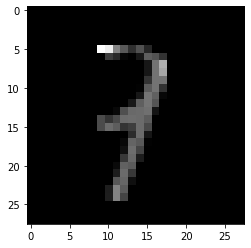

In [15]:
plt.imshow(x_test[1500], cmap="gray") # Import the image
plt.show() # Show the image